# Curse of dimensionality

Dimensions: Columns in the dataset that represent features of the row points   
Dimensionality: Number of features/columns characterizing the dataset


As the dimensionalities of the data grow, the feature space grows rapidly.    
Why even bother?

- Big computational cost to handle high-dimensional dlata.

- Estimation accuracy decreases.

- Difficult interpretation of the data.

**The mtcars dataset**

In [4]:
# Explore cars with summary()
summary(mtcars)

      mpg             cyl             disp             hp       
 Min.   :10.40   Min.   :4.000   Min.   : 71.1   Min.   : 52.0  
 1st Qu.:15.43   1st Qu.:4.000   1st Qu.:120.8   1st Qu.: 96.5  
 Median :19.20   Median :6.000   Median :196.3   Median :123.0  
 Mean   :20.09   Mean   :6.188   Mean   :230.7   Mean   :146.7  
 3rd Qu.:22.80   3rd Qu.:8.000   3rd Qu.:326.0   3rd Qu.:180.0  
 Max.   :33.90   Max.   :8.000   Max.   :472.0   Max.   :335.0  
      drat             wt             qsec             vs        
 Min.   :2.760   Min.   :1.513   Min.   :14.50   Min.   :0.0000  
 1st Qu.:3.080   1st Qu.:2.581   1st Qu.:16.89   1st Qu.:0.0000  
 Median :3.695   Median :3.325   Median :17.71   Median :0.0000  
 Mean   :3.597   Mean   :3.217   Mean   :17.85   Mean   :0.4375  
 3rd Qu.:3.920   3rd Qu.:3.610   3rd Qu.:18.90   3rd Qu.:1.0000  
 Max.   :4.930   Max.   :5.424   Max.   :22.90   Max.   :1.0000  
       am              gear            carb      
 Min.   :0.0000   Min.   :3.000  

In [5]:
dim(mtcars)

[1] 32 11

**Exploring correlation**   
- Correlation matrix is a matrix of correlation coefficients.
- Smaller number of dimensions translates to less complex correlation matrix.

In [67]:
# Get the correlation matrix with cor()
mtcars$cyl <- as.numeric(as.character(mtcars$cyl))
mtcars_correl <- cor(mtcars, use = "complete.obs")
mtcars_correl

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.0000000,-0.8521620,-0.8475514,-0.7761684,0.68117191,-0.8676594,0.41868403,0.6640389,0.59983243,0.4802848,-0.55092507
cyl,-0.8521620,1.0000000,0.9020329,0.8324475,-0.69993811,0.7824958,-0.59124207,-0.8108118,-0.52260705,-0.4926866,0.52698829
disp,-0.8475514,0.9020329,1.0000000,0.7909486,-0.71021393,0.8879799,-0.43369788,-0.7104159,-0.59122704,-0.5555692,0.39497686
hp,-0.7761684,0.8324475,0.7909486,1.0000000,-0.44875912,0.6587479,-0.70822339,-0.7230967,-0.24320426,-0.1257043,0.74981247
drat,0.6811719,-0.6999381,-0.7102139,-0.4487591,1.00000000,-0.7124406,0.09120476,0.4402785,0.71271113,0.6996101,-0.09078980
wt,-0.8676594,0.7824958,0.8879799,0.6587479,-0.71244065,1.0000000,-0.17471588,-0.5549157,-0.69249526,-0.5832870,0.42760594
qsec,0.4186840,-0.5912421,-0.4336979,-0.7082234,0.09120476,-0.1747159,1.00000000,0.7445354,-0.22986086,-0.2126822,-0.65624923
vs,0.6640389,-0.8108118,-0.7104159,-0.7230967,0.44027846,-0.5549157,0.74453544,1.0000000,0.16834512,0.2060233,-0.56960714
am,0.5998324,-0.5226070,-0.5912270,-0.2432043,0.71271113,-0.6924953,-0.22986086,0.1683451,1.00000000,0.7940588,0.05753435
gear,0.4802848,-0.4926866,-0.5555692,-0.1257043,0.69961013,-0.5832870,-0.21268223,0.2060233,0.79405876,1.0000000,0.27407284


**Visualising correlation patterns with ggcorrplot**

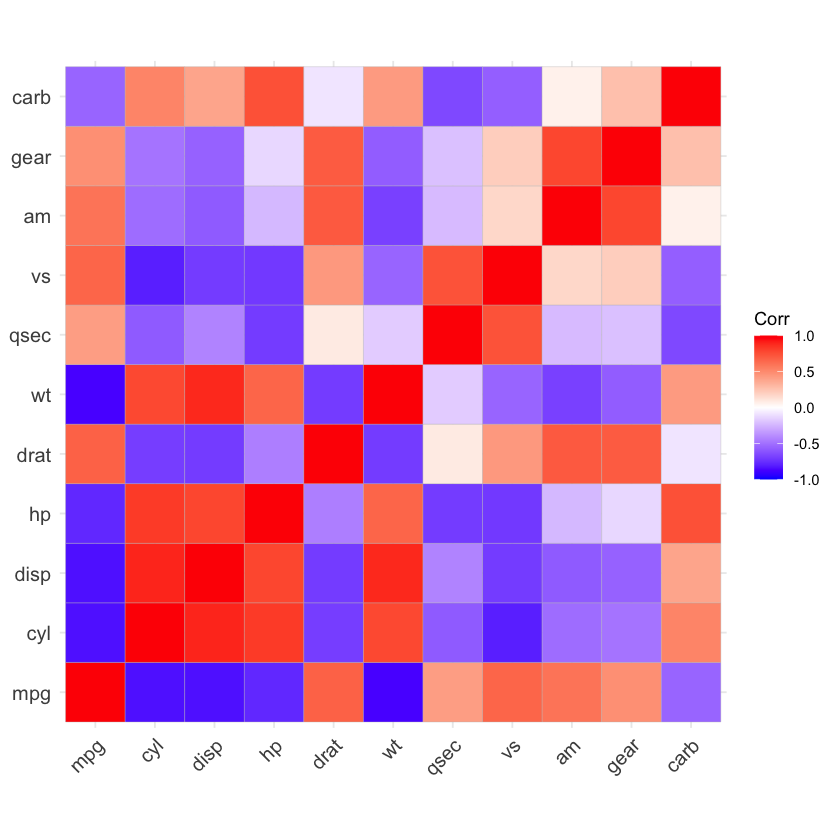

In [68]:
library(ggcorrplot)

# Use ggcorrplot() to explore the correlation matrix
ggcorrplot(mtcars_correl)

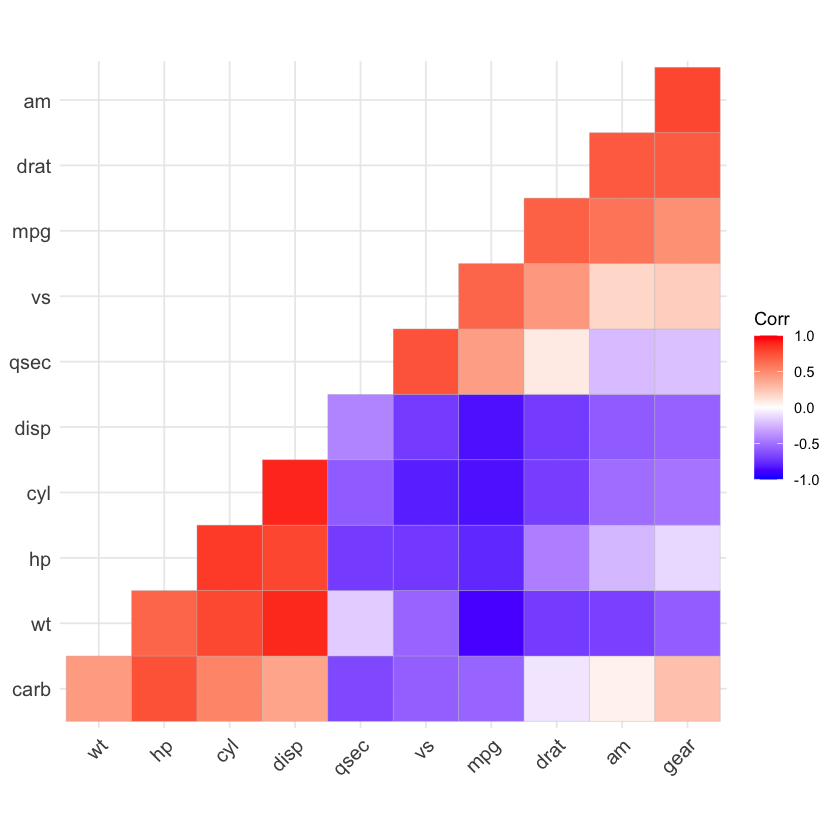

In [69]:
# Conduct hierarchical clustering on the correlation matrix
ggcorrplot(mtcars_correl, hc.order = TRUE, type = "lower")

# PCA with prcomp(to do)

In [157]:
library(stats)

In [159]:
pr.iris <- prcomp(x = iris[-5],
                scale = FALSE, #  if the data should be scaled to standard deviation of one before performing PCA
                center = TRUE) #  if the data should be centered around 0 before performing PCA
summary(pr.iris) 

Importance of components:
                          PC1     PC2    PC3     PC4
Standard deviation     2.0563 0.49262 0.2797 0.15439
Proportion of Variance 0.9246 0.05307 0.0171 0.00521
Cumulative Proportion  0.9246 0.97769 0.9948 1.00000

# PCA with FactoMineR


**PCA: What does it do?**

Conceptually:

1. Removes correlation.

2. Extracts new dimensions (=principal
components).

3. Reveals the true dimensionality of the
data.


Practically:

1. Decomposes the correlation matrix.
2. Changes the coordinate system.
3. Helps reduce the number of dimensions.


**PCA: The five steps to perform**

1. Pre-processing steps
    - Centering
    - Standardisation
2. Change of coordinate system
    - Rotation
    - Projection
3. Explcined variance
    - Reduction

**PCA with base R's prcomp()**

`prcomp`'s output includes the most important `PCA` index; the loadings of the variables.

In [70]:
mtcars_pca <- prcomp(mtcars)
mtcars_pca

Standard deviations (1, .., p=11):
 [1] 136.5330479  38.1480776   3.0710166   1.3066508   0.9064862   0.6635411
 [7]   0.3085791   0.2859604   0.2506973   0.2106519   0.1984238

Rotation (n x k) = (11 x 11):
              PC1          PC2          PC3          PC4         PC5
mpg  -0.038118199  0.009184847  0.982070847  0.047634784 -0.08832843
cyl   0.012035150 -0.003372487 -0.063483942 -0.227991962  0.23872590
disp  0.899568146  0.435372320  0.031442656 -0.005086826 -0.01073597
hp    0.434784387 -0.899307303  0.025093049  0.035715638  0.01655194
drat -0.002660077 -0.003900205  0.039724928 -0.057129357 -0.13332765
wt    0.006239405  0.004861023 -0.084910258  0.127962867 -0.24354296
qsec -0.006671270  0.025011743 -0.071670457  0.886472188 -0.21416101
vs   -0.002729474  0.002198425  0.004203328  0.177123945 -0.01688851
am   -0.001962644 -0.005793760  0.054806391 -0.135658793 -0.06270200
gear -0.002604768 -0.011272462  0.048524372 -0.129913811 -0.27616440
carb  0.005766010 -0.027779208 -0

**PCA with FactoMineR's PCAO()**

Its `PCA()` function takes a dataset or correlation matrix and generates two graphs and a series of informative indices for five kept dimensions, by default. `PCA()`, unlike `prcomp()`, does not return the loadings but the coordinates of the variables in the new data representation.

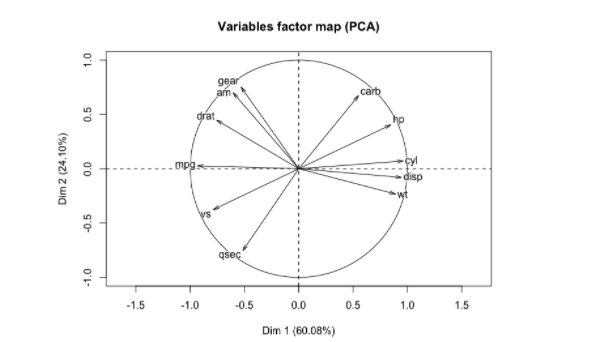


On the first PC (horizontal axis), variables such as `cyl` (number_of_cylinders), `wt` (weight) and `disp` (`displacement_in_cubic_inches`) take positive values and are placed in the right end of the axis, while `mpg` (`miles_per_gallon`) sits in the exactly opposite side taking negative values. A plausible explanation is that the first PC separates cars that are "powerful and heavy" on the right side from the ones that are "economical" and "lightweight" on the left side. The second PC seems to reveal another hidden feature of the mtcars dataset, namely speed; Cars with lots of gears are placed higher, while slower ones that have higher values for qsec (1/4-mile-time) take lower values in the second PC.

In [71]:
library(FactoMineR)
mtcars_pca <- PCA(mtcars)
mtcars_pca

Warning message:
“ggrepel: 6 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


**Results for the Principal Component Analysis (PCA)**
The analysis was performed on 32 individuals, described by 11 variables
*The results are available in the following objects:

   name               description                          
1  "$eig"             "eigenvalues"                        
2  "$var"             "results for the variables"          
3  "$var$coord"       "coord. for the variables"           
4  "$var$cor"         "correlations variables - dimensions"
5  "$var$cos2"        "cos2 for the variables"             
6  "$var$contrib"     "contributions of the variables"     
7  "$ind"             "results for the individuals"        
8  "$ind$coord"       "coord. for the individuals"         
9  "$ind$cos2"        "cos2 for the individuals"           
10 "$ind$contrib"     "contributions of the individuals"   
11 "$call"            "summary statistics"                 
12 "$call$centre"     "mean of the variables"              
13 "$call$ecart.type" "standard error o

`PCA()`'s property `eig` outputs a matrix with three columns; the most important ones being the percentages of variance and cumulative variance explained by the PCs.

In [72]:
mtcars_pca$eig

,eigenvalue,percentage of variance,cumulative percentage of variance
comp 1,6.60840025,60.0763659,60.07637
comp 2,2.65046789,24.0951627,84.17153
comp 3,0.62719727,5.7017934,89.87332
comp 4,0.26959744,2.4508858,92.32421
comp 5,0.22345110,2.0313737,94.35558
comp 6,0.21159612,1.9236011,96.27918
comp 7,0.13526199,1.2296544,97.50884
comp 8,0.12290143,1.1172858,98.62612
comp 9,0.07704665,0.7004241,99.32655
comp 10,0.05203544,0.4730495,99.79960


`Cos2` stands for squared cosine and is an index for the quality of representation of both variables and individuals. The closer this value is to one, the better the quality.

In [73]:
mtcars_pca$var $cos2

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
mpg,0.8685312,0.0006891117,0.031962249,1.369725e-04,0.0023634487
cyl,0.9239416,0.0050717032,0.019276287,1.811054e-06,0.0007642822
disp,0.8958370,0.0064482423,0.002370993,1.775235e-02,0.0346868281
hp,0.7199031,0.1640467049,0.012295659,1.234773e-03,0.0651697911
drat,0.5717921,0.1999959326,0.016295731,1.970035e-01,0.0013361275
wt,0.7916038,0.0542284172,0.073281663,1.630161e-02,0.0012578888
qsec,0.2655437,0.5690984542,0.101947952,1.249426e-03,0.0060588455
vs,0.6208539,0.1422249798,0.115330572,1.244460e-02,0.0803189801
am,0.3647715,0.4887450097,0.026555457,2.501834e-04,0.0018011675
gear,0.2829342,0.5665806069,0.052667265,1.888829e-02,0.0005219259


The `mtcars_pca$var$contrib` object demonstrates the contributions in percentage of all variables in the determination of PCs, while the `dimdesc()` function produces the most correlated variables to the first PCs

In [74]:
mtcars_pca$var$contrib

,Dim.1,Dim.2,Dim.3,Dim.4,Dim.5
mpg,13.142837,0.02599962,5.0960440,5.080631e-02,1.0577029
cyl,13.981320,0.19135124,3.0734010,6.717622e-04,0.3420355
disp,13.556034,0.24328694,0.3780299,6.584761e+00,15.5232297
hp,10.893757,6.18934888,1.9604134,4.580062e-01,29.1651238
drat,8.652504,7.54568403,2.5981826,7.307322e+01,0.5979507
wt,11.978751,2.04599412,11.6839894,6.046647e+00,0.5629370
qsec,4.018275,21.47162226,16.2545274,4.634414e-01,2.7114861
vs,9.394919,5.36603293,18.3882452,4.615993e+00,35.9447677
am,5.519816,18.43995209,4.2339880,9.279888e-02,0.8060678
gear,4.281433,21.37662593,8.3972408,7.006107e+00,0.2335750


In [75]:
dimdesc(mtcars_pca)

,correlation,p.value
cyl,0.9612188,2.471950e-18
disp,0.9464866,2.804047e-16
wt,0.8897212,9.780198e-12
hp,0.8484710,8.622043e-10
carb,0.5501711,1.105272e-03
qsec,-0.5153093,2.542578e-03
gear,-0.5319156,1.728737e-03
am,-0.6039632,2.520665e-04
drat,-0.7561693,5.575736e-07
vs,-0.7879428,8.658012e-08


# Interpreting and visualising PCA models with factoextra

`FactoMineR`'s `PCA()` function outputs two graphs by default, the individuals' and the factors' maps. However, here we can use `factoextra`, a wrap-up package that provides ggplot2-like visualisations of `PCA` model objects produced by a number of `R` packages, including `FactoMineR`.

In [76]:
library("factoextra")

## Plotting contributions of variables

`fviz_pca_var()` plots the contributions of the variables on the construction of the PCs. In this first chuck of code, we use the arguments `col.var`, to look for variables' contributions, `gradient.cols` for creating the effect of gradience in the colouring of the contributions and `repel` to avoid point cluttering.

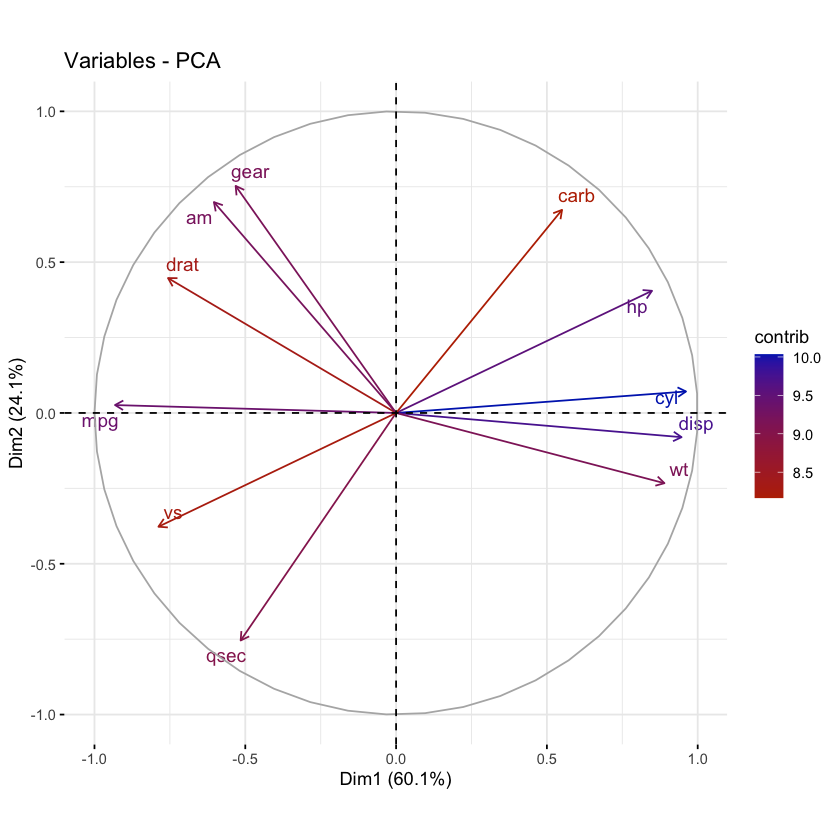

In [77]:
fviz_pca_var(mtcars_pca, 
             col.var = "contrib", 
             gradient.cols = c("#bb2e00","#002bbb"), 
             repel = TRUE)

## Plotting contributions of selected variables

For displaying the contribution of selected variables, e.g. the top 4 in contribution, instead of `col.var`, we supply a list to the argument `select.var`.

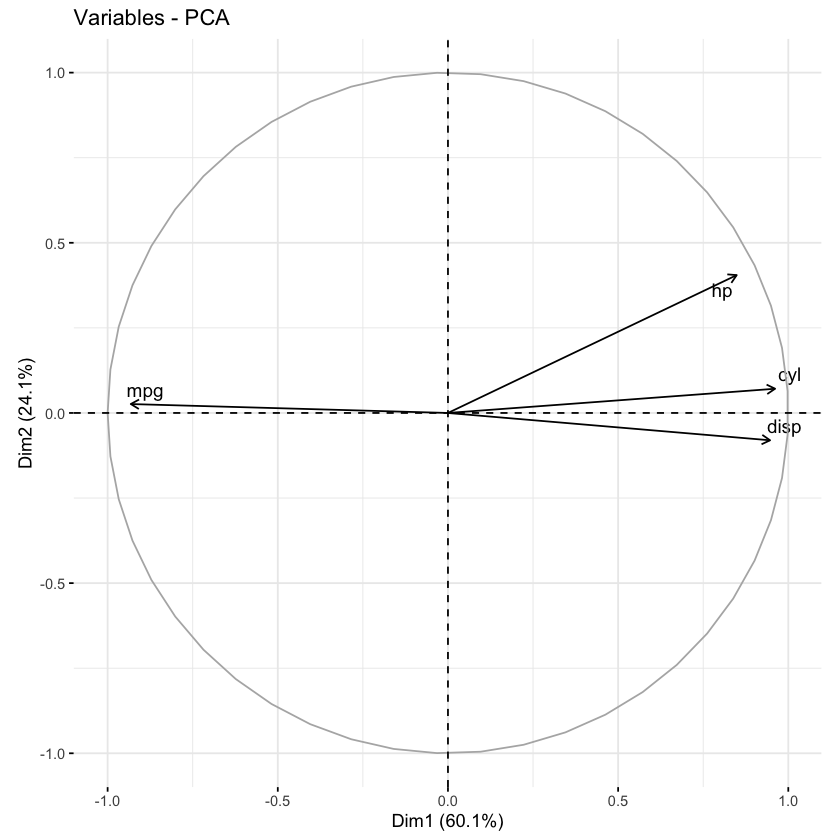

In [78]:
fviz_pca_var(mtcars_pca, 
             select.var = list(contrib = 4), 
             repel = TRUE)

## Barplotting the contributions of variables

`fviz_contrib()` produces barplots of individuals' or variables' contributions. The red line corresponds to the expected percentage if the distribution of contributions were uniform.

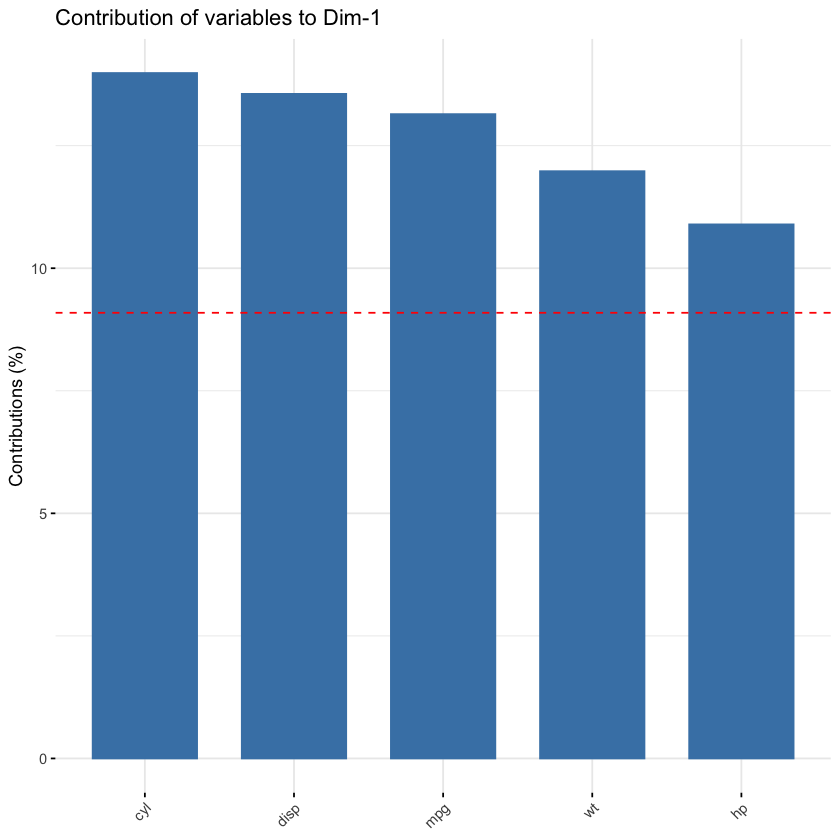

In [79]:
fviz_contrib(mtcars_pca, 
             choice = 'var', 
             axes = 1, 
             top = 5)

## Plotting cos2 for individuals

One other important index for interpreting `PCA` models is the squared cosine, abbreviated as `cos2` in both `FactoMineR` and `factoextra`. This index reflects how accurate the representation of our variables or individuals on the PC plane are. For plotting the `cos2` of the individuals for `mtcars_pca`, we only need to tweak the `fviz_pca_ind()` function by either adjusting the `col.ind` argument for all individuals...

Warning message:
“ggrepel: 6 unlabeled data points (too many overlaps). Consider increasing max.overlaps”


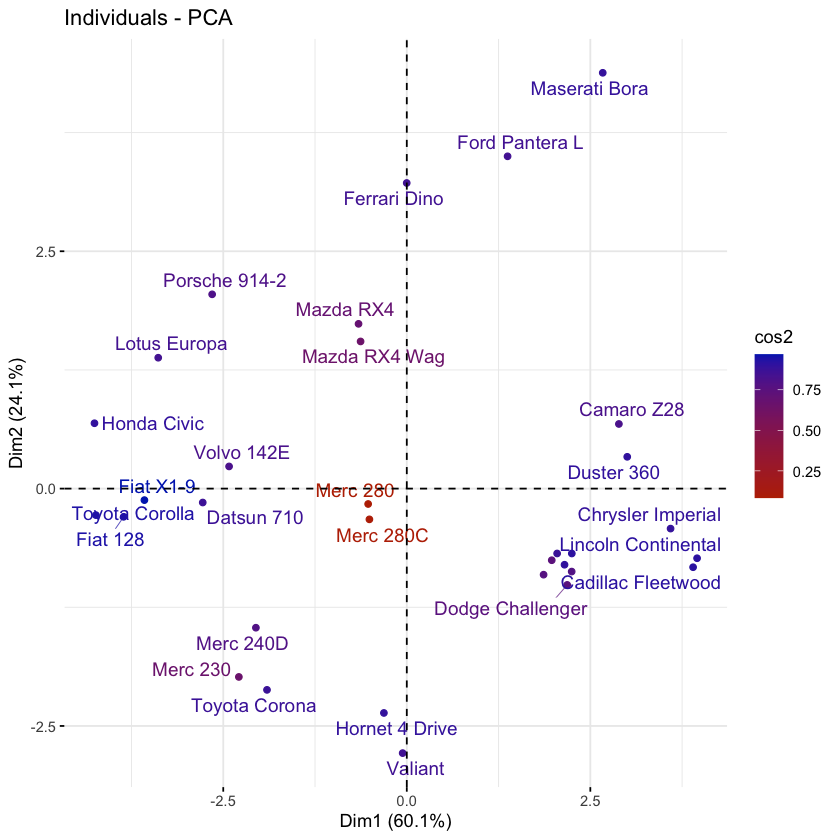

In [80]:
fviz_pca_ind(mtcars_pca, 
             col.ind = "cos2", 
             gradient.cols = c("#bb2e00","#002bbb"), 
             repel = TRUE)

## Plotting cos2 for selected individuals

...or the `select.ind` argument for individuals with a `cos2` higher than a value, 0.8 here.

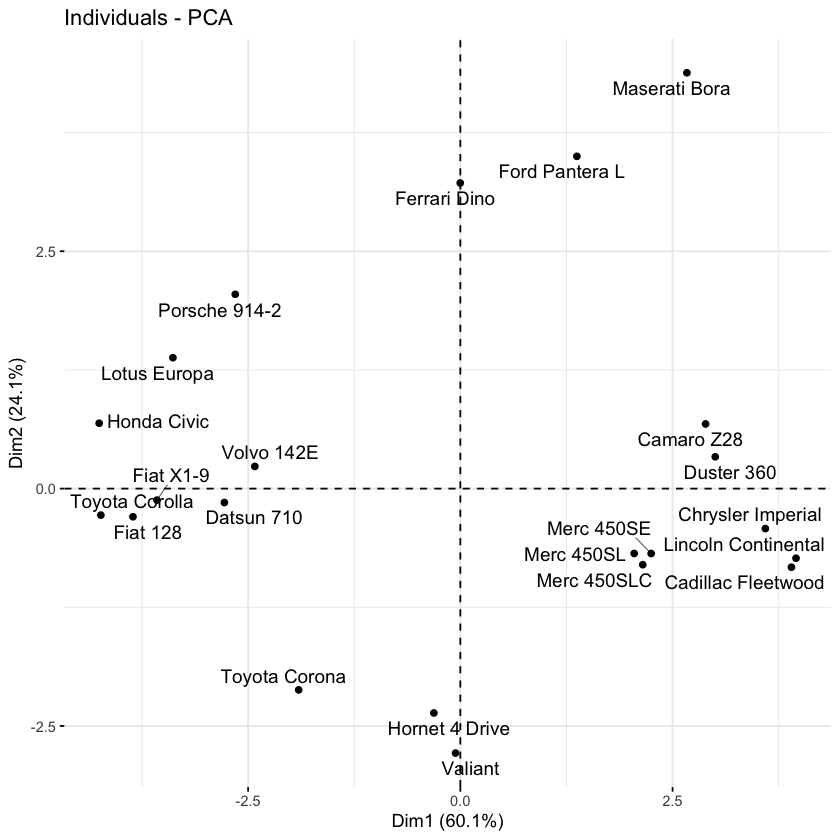

In [81]:
fviz_pca_ind(mtcars_pca, 
             select.ind = list(cos2 = 0.8),
             gradient.cols = c("#bb2e00","#002bbb"), 
             repel = TRUE)

## Barplotting cos2 for individuals

The function `fviz_cos2()` outputs a barplot with the quality of representation of either individuals or variables, depending on the value of the `choice` argument, on the different axes. Here, we chose the `cos2` of the top 10 individuals in the first dimension.

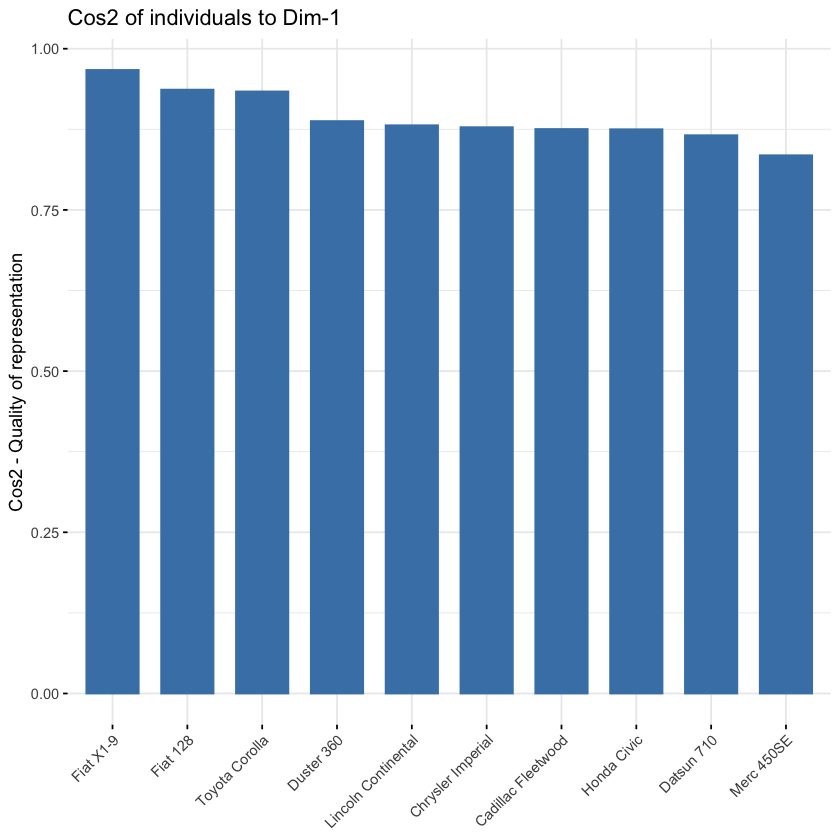

In [54]:
fviz_cos2(mtcars_pca, 
          choice = "ind", 
          axes = 1, 
          top = 10)

## Biplots

Biplots are graphs that offer a compact way to summarise the relationships between individuals, between variables, and also between variables and individuals within the same plot. For instance, by applying `factoextra`'s `fviz_pca_biplot()` function on the `mtcars_pca` object, the interpretation of the PCs is now much easier and provides better insights. Cars placed on the left lower corner, such as Toyota Corona, indeed are more economical and slower with fewer gears and automatic transmission, while on the top right side we find the opposite, Maseratti; Maseratti is poweful with high gross horsepower and number of carburetors (thus, on the right side) and manual with lots of gear (thus on the top side).


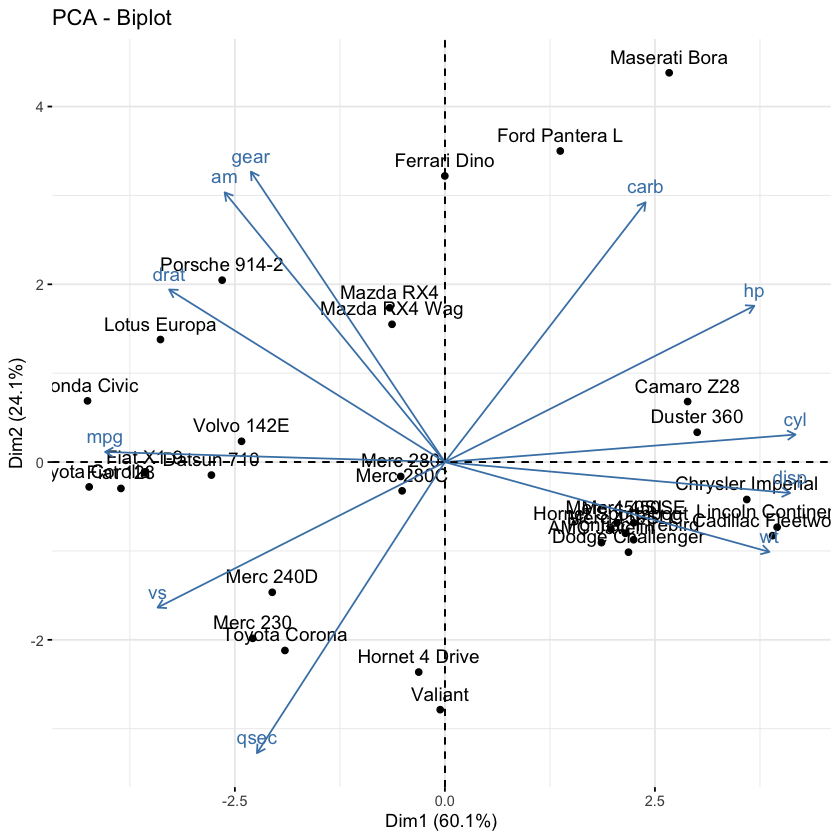

In [82]:
fviz_pca_biplot(mtcars_pca)

## Adding ellipsoids

`FactoMineR` is flexible enough to apply `PCA` on subsets of our data. In that case, some qualitative variables or individuals can be considered supplementary and not be exploited for the construction of the PCs. This supplementary information can be used for adding ellipsoids on the biplot that further advances interpretation.    

Before using `fviz_pca_ind()`, we need to make sure that there is at least one qualitative variable and that it makes sense to use it as a supplementary variable. The variable `cyl`, the number of cylinders, is of numeric type, but has a few values and can be considered as qualitative variable, after being converted into a factor. 

In [84]:
mtcars$cyl <- as.factor(mtcars$cyl)


Now, we can use `fviz_pca_ind()` with its arguments `addEllipses` for creating the actual ellipses and `habillage` (the French word for "dressing") for exploiting the levels of the supplementary variable `cyl` to assign colors to individuals. It seems that `cyl` has sufficient discriminative power to express the value differences in the first PC.

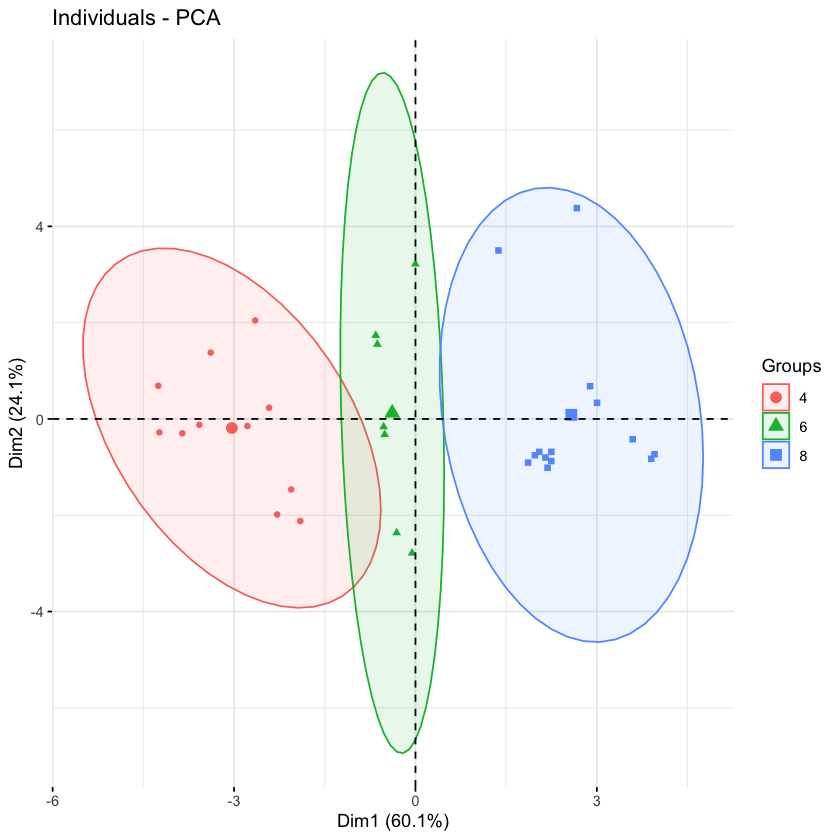

In [85]:
fviz_pca_ind(mtcars_pca,
            label="var",
            habillage=mtcars$cyl,
            addEllipses=TRUE)

# Determining the right number of PCs

Stopping rules

1. The Scree test

2. The Kaiser-Guttman rule

3. Parallel analysis

## The Scree test


- The first step is to construct the screeplot. The screeplot is a barplot of the proportion of explained variance as a function of principal components.    
- The second step is to observe the screeplot and make a decision based on the point where the slope of the downward curve levels off. Due to its resemblence with an elbow, this stopping rule is also known as the **elbow criterion**. 

In our case, the elbow point is at the third `PC`, so we can safely ignore the PCs to the right of the elbow point. Therefore, the scree test recommends retaining the first 2 `PC`s.

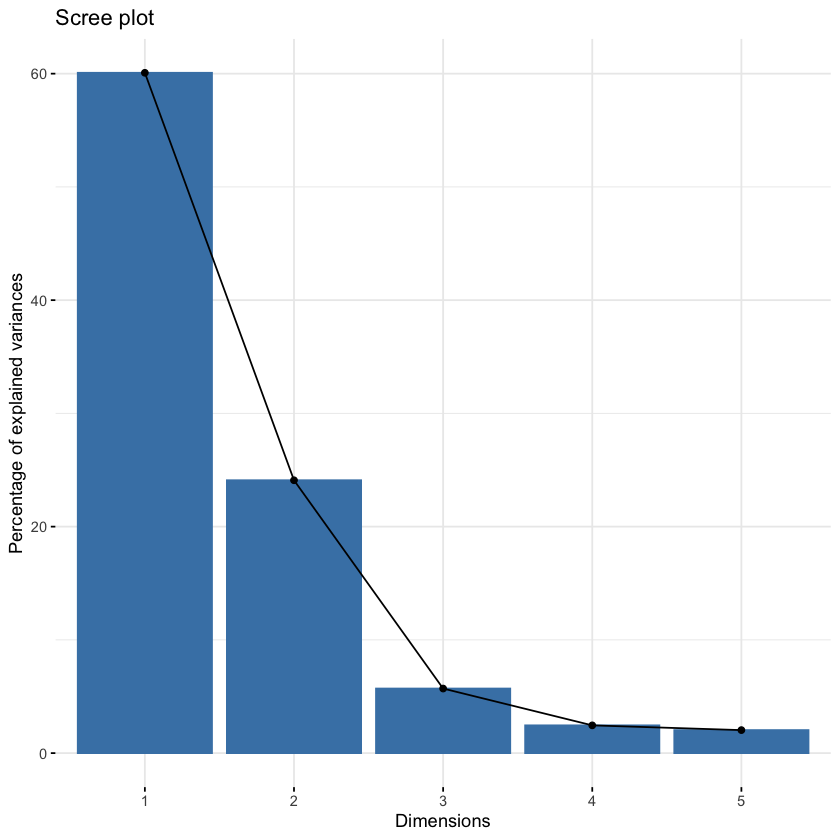

In [86]:
fviz_screeplot(mtcars_pca, ncp=5)

## The Kaiser-Guttman rule

Keep the PCs with eigenvalue > 1

Skipping the math details related to eigenvalues, the important thing to note here is that `PC`s with eigenvalues less than one explain less of the total variance than a single original variable does on average. Therefore, by choosing `PC`s with eigenvalues greater than one, we maintain those `PC`s that express more of the variability than each of the original variables. 

You can examine the eigenvalues by any of the three following options: the `summary() `function (enhanced for handling `PCA` objects such as `mtcar_pca`), the property `eig` of `mtcar_pca`, or the `factoextra`'s function `get_eigenvalue()`. 


All of the options result in vectors with the eigenvalues in descending order. Here, the `Kaiser-Guttman` rule points us to keep only the first two `PC`s, in accordance with the scree test.

In [95]:
summary(mtcars_pca)
mtcars_pca$eig
get_eigenvalue(mtcars_pca)


Call:
PCA(X = mtcars) 


Eigenvalues
                       Dim.1   Dim.2   Dim.3   Dim.4   Dim.5   Dim.6   Dim.7
Variance               6.608   2.650   0.627   0.270   0.223   0.212   0.135
% of var.             60.076  24.095   5.702   2.451   2.031   1.924   1.230
Cumulative % of var.  60.076  84.172  89.873  92.324  94.356  96.279  97.509
                       Dim.8   Dim.9  Dim.10  Dim.11
Variance               0.123   0.077   0.052   0.022
% of var.              1.117   0.700   0.473   0.200
Cumulative % of var.  98.626  99.327  99.800 100.000

Individuals (the 10 first)
                      Dist    Dim.1    ctr   cos2    Dim.2    ctr   cos2  
Mazda RX4         |  2.234 | -0.657  0.204  0.087 |  1.735  3.551  0.604 |
Mazda RX4 Wag     |  2.081 | -0.629  0.187  0.091 |  1.550  2.833  0.555 |
Datsun 710        |  2.987 | -2.779  3.653  0.866 | -0.146  0.025  0.002 |
Hornet 4 Drive    |  2.521 | -0.312  0.046  0.015 | -2.363  6.584  0.879 |
Hornet Sportabout |  2.456 |  1.974  1.

,eigenvalue,percentage of variance,cumulative percentage of variance
comp 1,6.60840025,60.0763659,60.07637
comp 2,2.65046789,24.0951627,84.17153
comp 3,0.62719727,5.7017934,89.87332
comp 4,0.26959744,2.4508858,92.32421
comp 5,0.22345110,2.0313737,94.35558
comp 6,0.21159612,1.9236011,96.27918
comp 7,0.13526199,1.2296544,97.50884
comp 8,0.12290143,1.1172858,98.62612
comp 9,0.07704665,0.7004241,99.32655
comp 10,0.05203544,0.4730495,99.79960


,eigenvalue,variance.percent,cumulative.variance.percent
Dim.1,6.60840025,60.0763659,60.07637
Dim.2,2.65046789,24.0951627,84.17153
Dim.3,0.62719727,5.7017934,89.87332
Dim.4,0.26959744,2.4508858,92.32421
Dim.5,0.22345110,2.0313737,94.35558
Dim.6,0.21159612,1.9236011,96.27918
Dim.7,0.13526199,1.2296544,97.50884
Dim.8,0.12290143,1.1172858,98.62612
Dim.9,0.07704665,0.7004241,99.32655
Dim.10,0.05203544,0.4730495,99.79960


## Parallel Analysis

Parallel Analysis is generally considered a superior method to the previous ones, since it contrasts the variability expressed in the original dataset with that obtained from randomly-generated datasets with the same number of observations and uncorrelated variables to the original. The idea is that you can adjust the `PCA` model's indices so that they are affected by the variability induced by the sample error of randomly-generated datasets with the same characteristics. Now, `PC`s with adjusted eigenvalues greater than one indeed express more of the variability than each of the original variables. 

In `R`, the `paran()` function of the `paran` package implements parallel analysis. Among the numerous interesting arguments of the `paran()` function, the `graph` argument provides an additional graphical output, similar to screeplot that clearly indicates the number of `PC`s to retain, 2 in our case. Again, Parallel Analysis agrees with the previous stopping rules.

In [121]:
library(paran)
library(psych)

In [123]:
# Subset the complete rows of airquality.
airquality_complete <- airquality[complete.cases(airquality), ]

# Conduct a parallel analysis with paran().
air_paran <- paran(airquality_complete, seed = 1)

# Check out the suggested number of PCs to retain.
air_paran$Retained


Using eigendecomposition of correlation matrix.
Computing: 10%  20%  30%  40%  50%  60%  70%  80%  90%  100%


Results of Horn's Parallel Analysis for component retention
180 iterations, using the mean estimate

-------------------------------------------------- 
Component   Adjusted    Unadjusted    Estimated 
            Eigenvalue  Eigenvalue    Bias 
-------------------------------------------------- 
1           2.137510    2.468840      0.331329
-------------------------------------------------- 

Adjusted eigenvalues > 1 indicate dimensions to retain.
(1 components retained)



[1] 1


`fa.parallel()` has one advantage over the `paran()` function; it allows you to use more of your data while building the correlation matrix. On the other hand, `paran()` does not handle missing data and you should first exclude missing values before passing the data to the function. For checking out the suggested number of PCs to retain, `fa.parallel()`'s output object includes the attribute `ncomp`.

Parallel analysis suggests that the number of factors =  3  and the number of components =  1 


[1] 1

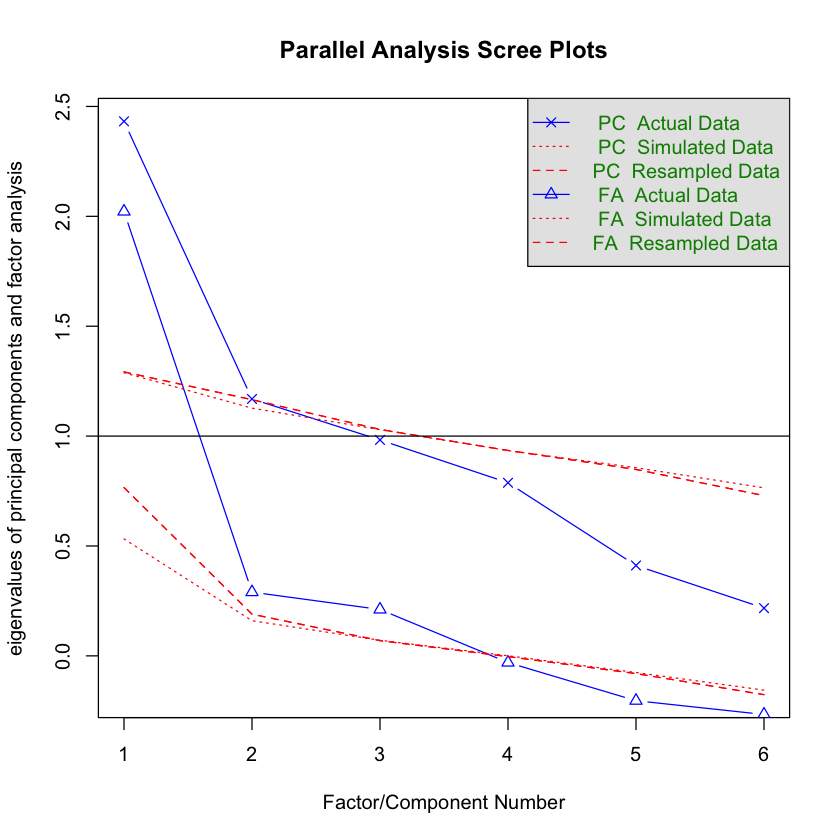

In [124]:
# Conduct a parallel analysis with fa.parallel().
air_fa_parallel <- fa.parallel(airquality)

# Check out the suggested number of PCs to retain.
air_fa_parallel$ncomp

# Performing PCA on datasets with missing values

## Exploring datasets with missing values


In [131]:
# install.packages("VIM")
library(VIM)
sleep[!complete.cases(VIM::sleep),]

,BodyWgt,BrainWgt,NonD,Dream,Sleep,Span,Gest,Pred,Exp,Danger
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>
1,6654.000,5712.0,NA,NA,3.3,38.6,645,3,5,3
3,3.385,44.5,NA,NA,12.5,14.0,60,1,1,1
4,0.920,5.7,NA,NA,16.5,NA,25,5,2,3
13,0.550,2.4,7.6,2.7,10.3,NA,NA,2,1,2
14,187.100,419.0,NA,NA,3.1,40.0,365,5,5,5
19,1.410,17.5,4.8,1.3,6.1,34.0,NA,1,2,1
20,60.000,81.0,12.0,6.1,18.1,7.0,NA,1,1,1
21,529.000,680.0,NA,0.3,NA,28.0,400,5,5,5
24,207.000,406.0,NA,NA,12.0,39.3,252,1,4,1


There are as many as 38 cells with missing values, indicated by `NA` (or not available)

In [132]:
sum(is.na(VIM::sleep))

[1] 38

## Estimation methods for PCA on datasets with missing values

From simplistic to sophisticated methods:

- Using the mean of the variable that includes NA values.(not preferred)
- Impute the missing values based on a linear regression regression model.
- Estimating missing values with PCA
    - Use `missMDA` and then `FactoMineR`
    - Use `pcaMethods`

### Estimating missing values with `missMDA`

**Iterative PCA algorithm**

- Initial step: use the mean for imputing the missing values
- Conduct PCA on the resulting complete dataset
- Use the coordinates of the newly-extracted PC s (initially taking the mean) for updating them.
- Repeat the previous two steps until convergence is achieved.

Conduct PCA on the completed dataset with `PCA()`

In [140]:
# install.packages("missMDA")
library(missMDA)

In [142]:
nPCs <- estim_ncpPCA(VIM::sleep)
nPCs$ncp

[1] 3

In [143]:
completed_sleep <- imputePCA(VIM::sleep, Nncp = nPCs$ncp,
                            scale = TRUE)

In [145]:
PCA(completed_sleep$completeObs)

**Results for the Principal Component Analysis (PCA)**
The analysis was performed on 62 individuals, described by 10 variables
*The results are available in the following objects:

   name               description                          
1  "$eig"             "eigenvalues"                        
2  "$var"             "results for the variables"          
3  "$var$coord"       "coord. for the variables"           
4  "$var$cor"         "correlations variables - dimensions"
5  "$var$cos2"        "cos2 for the variables"             
6  "$var$contrib"     "contributions of the variables"     
7  "$ind"             "results for the individuals"        
8  "$ind$coord"       "coord. for the individuals"         
9  "$ind$cos2"        "cos2 for the individuals"           
10 "$ind$contrib"     "contributions of the individuals"   
11 "$call"            "summary statistics"                 
12 "$call$centre"     "mean of the variables"              
13 "$call$ecart.type" "standard error o

### Imputing missing values with `pcaMethods`

The internals of `pca()`：

- Uses regression methods for approximation of the correlation matrix.
- Compiles `PCA` models
- Finally, it projects the new points back into the original space.



In [152]:
# if (!requireNamespace("BiocManager", quietly = TRUE))
#     install.packages("BiocManager")
# BiocManager::install(version = "3.13")

In [154]:
# library(pcaMethods)
# sleep_pca_methods <- pca(sleep, nPcs=2, method="ppca", center = TRUE)
# imp_air_pcamethods <- completeObs (sleep_pca_methods)